In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1.Download dataset
## 2.Load dataset

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0




## Perform Below Visualizations.

● Univariate Analysis

● Bi - Variate Analysis

●Multi - Variate Analysis 


## Univariate 

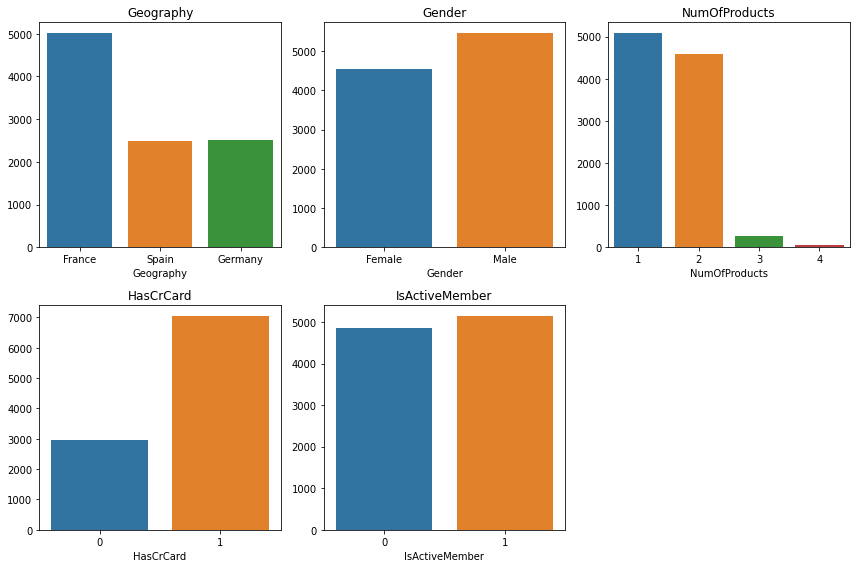

In [4]:
fig, axes = plt.subplots(2,3,figsize=(12,8))
valid_col =['Geography', 'Gender',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember']
for i, ax in enumerate(axes.flatten()):
    if i == 5:
        ax.axis('off')
        break
    sns.countplot(data=df,x=valid_col[i],ax=ax)
    ax.set_ylabel(None)
    ax.set_title(label=valid_col[i])
plt.tight_layout()

Observation from Univariate Analysis

● Most of the Customers are located in france

● Male customers are higher than that of Female customers

● Active and In Active members are more or less equal

● Most of the Customers own a credit card

● Most of the Customers atleast use 1 or 2 products from the bank


## Bivariate 

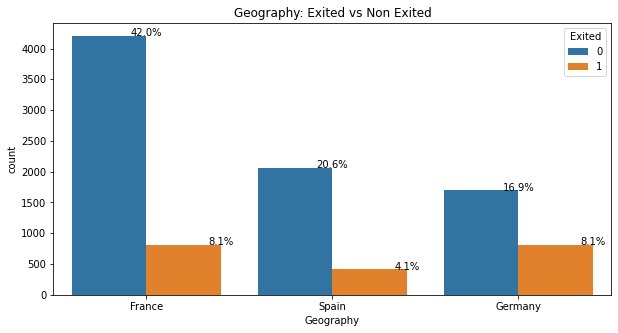

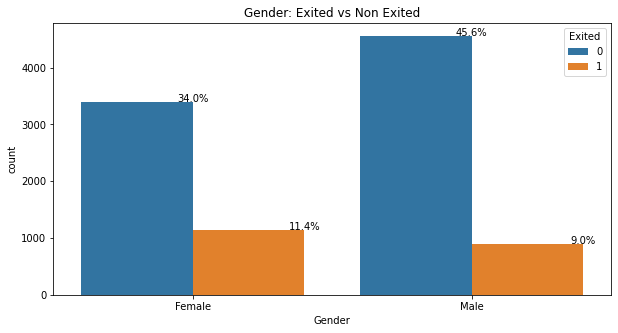

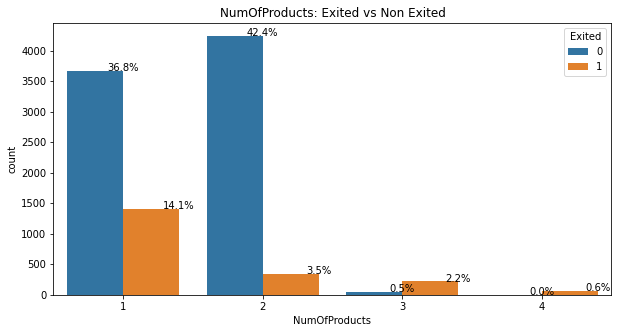

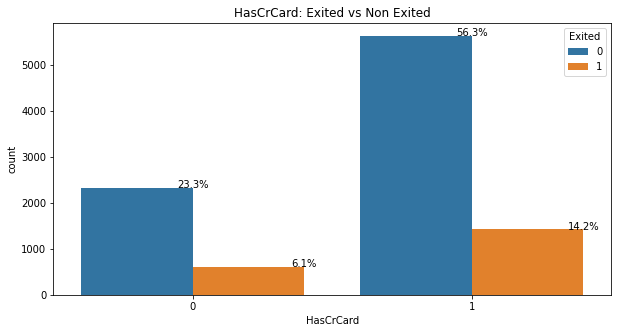

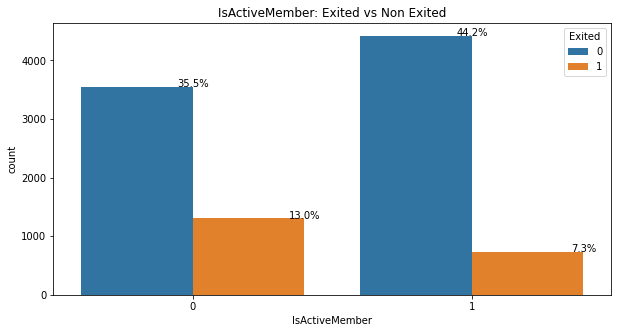

In [5]:
total=float(len(df))
Excepted_col=['Tenure','Age','CreditScore','Balance',"EstimatedSalary"]
Accepted_col=['Geography', 'Gender','NumOfProducts', 'HasCrCard', 'IsActiveMember']
for column in Accepted_col:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.countplot(data=df,x=column,hue='Exited',ax=ax)
    ax.set_title(column+': Exited vs Non Exited')
    ax.set_ylabel('count')
    for i in ax.patches:
        percent = '{:.1f}%'.format(100 * i.get_height()/total)
        x=i.get_x() + i.get_width()
        y=i.get_height()
        ax.annotate(percent,(x,y),ha='center')
    plt.show()

Observation from Bivariate Analysis - Catergorical

42% People who are located in France havent exited compared to other countries.

The churn % of Females are higher than Males

Customers who use more than 2 products are less possible to exit

Most of the customers who exit are inactive members

Most of the customers who exit have a credit card

Bivariate Analysis to understand each Numerical variables relation with target variable (Exited)

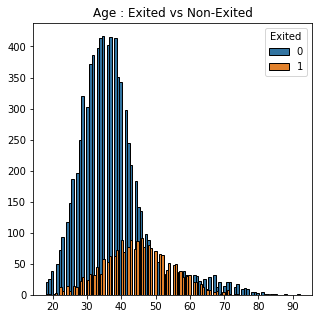

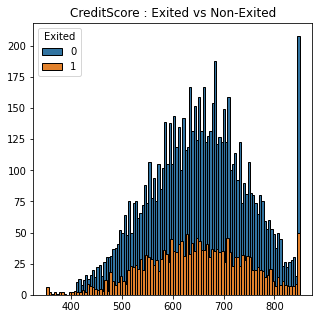

In [6]:
df_exited=df[df['Exited']==1]
df_not_exited=df[df['Exited']==0]
Excepted_col=['Age','CreditScore']
for column in Excepted_col:
    plt.figure(figsize=(5,5))
    plt.hist(x=column,bins=100,data=df_not_exited,edgecolor='black',color='#3274a1')
    plt.hist(x=column,bins=100,data=df_exited,edgecolor='black',color='#e1812c')
    plt.title(column+' : Exited vs Non-Exited')
    plt.legend([0,1],title='Exited')

## Multi-Variate

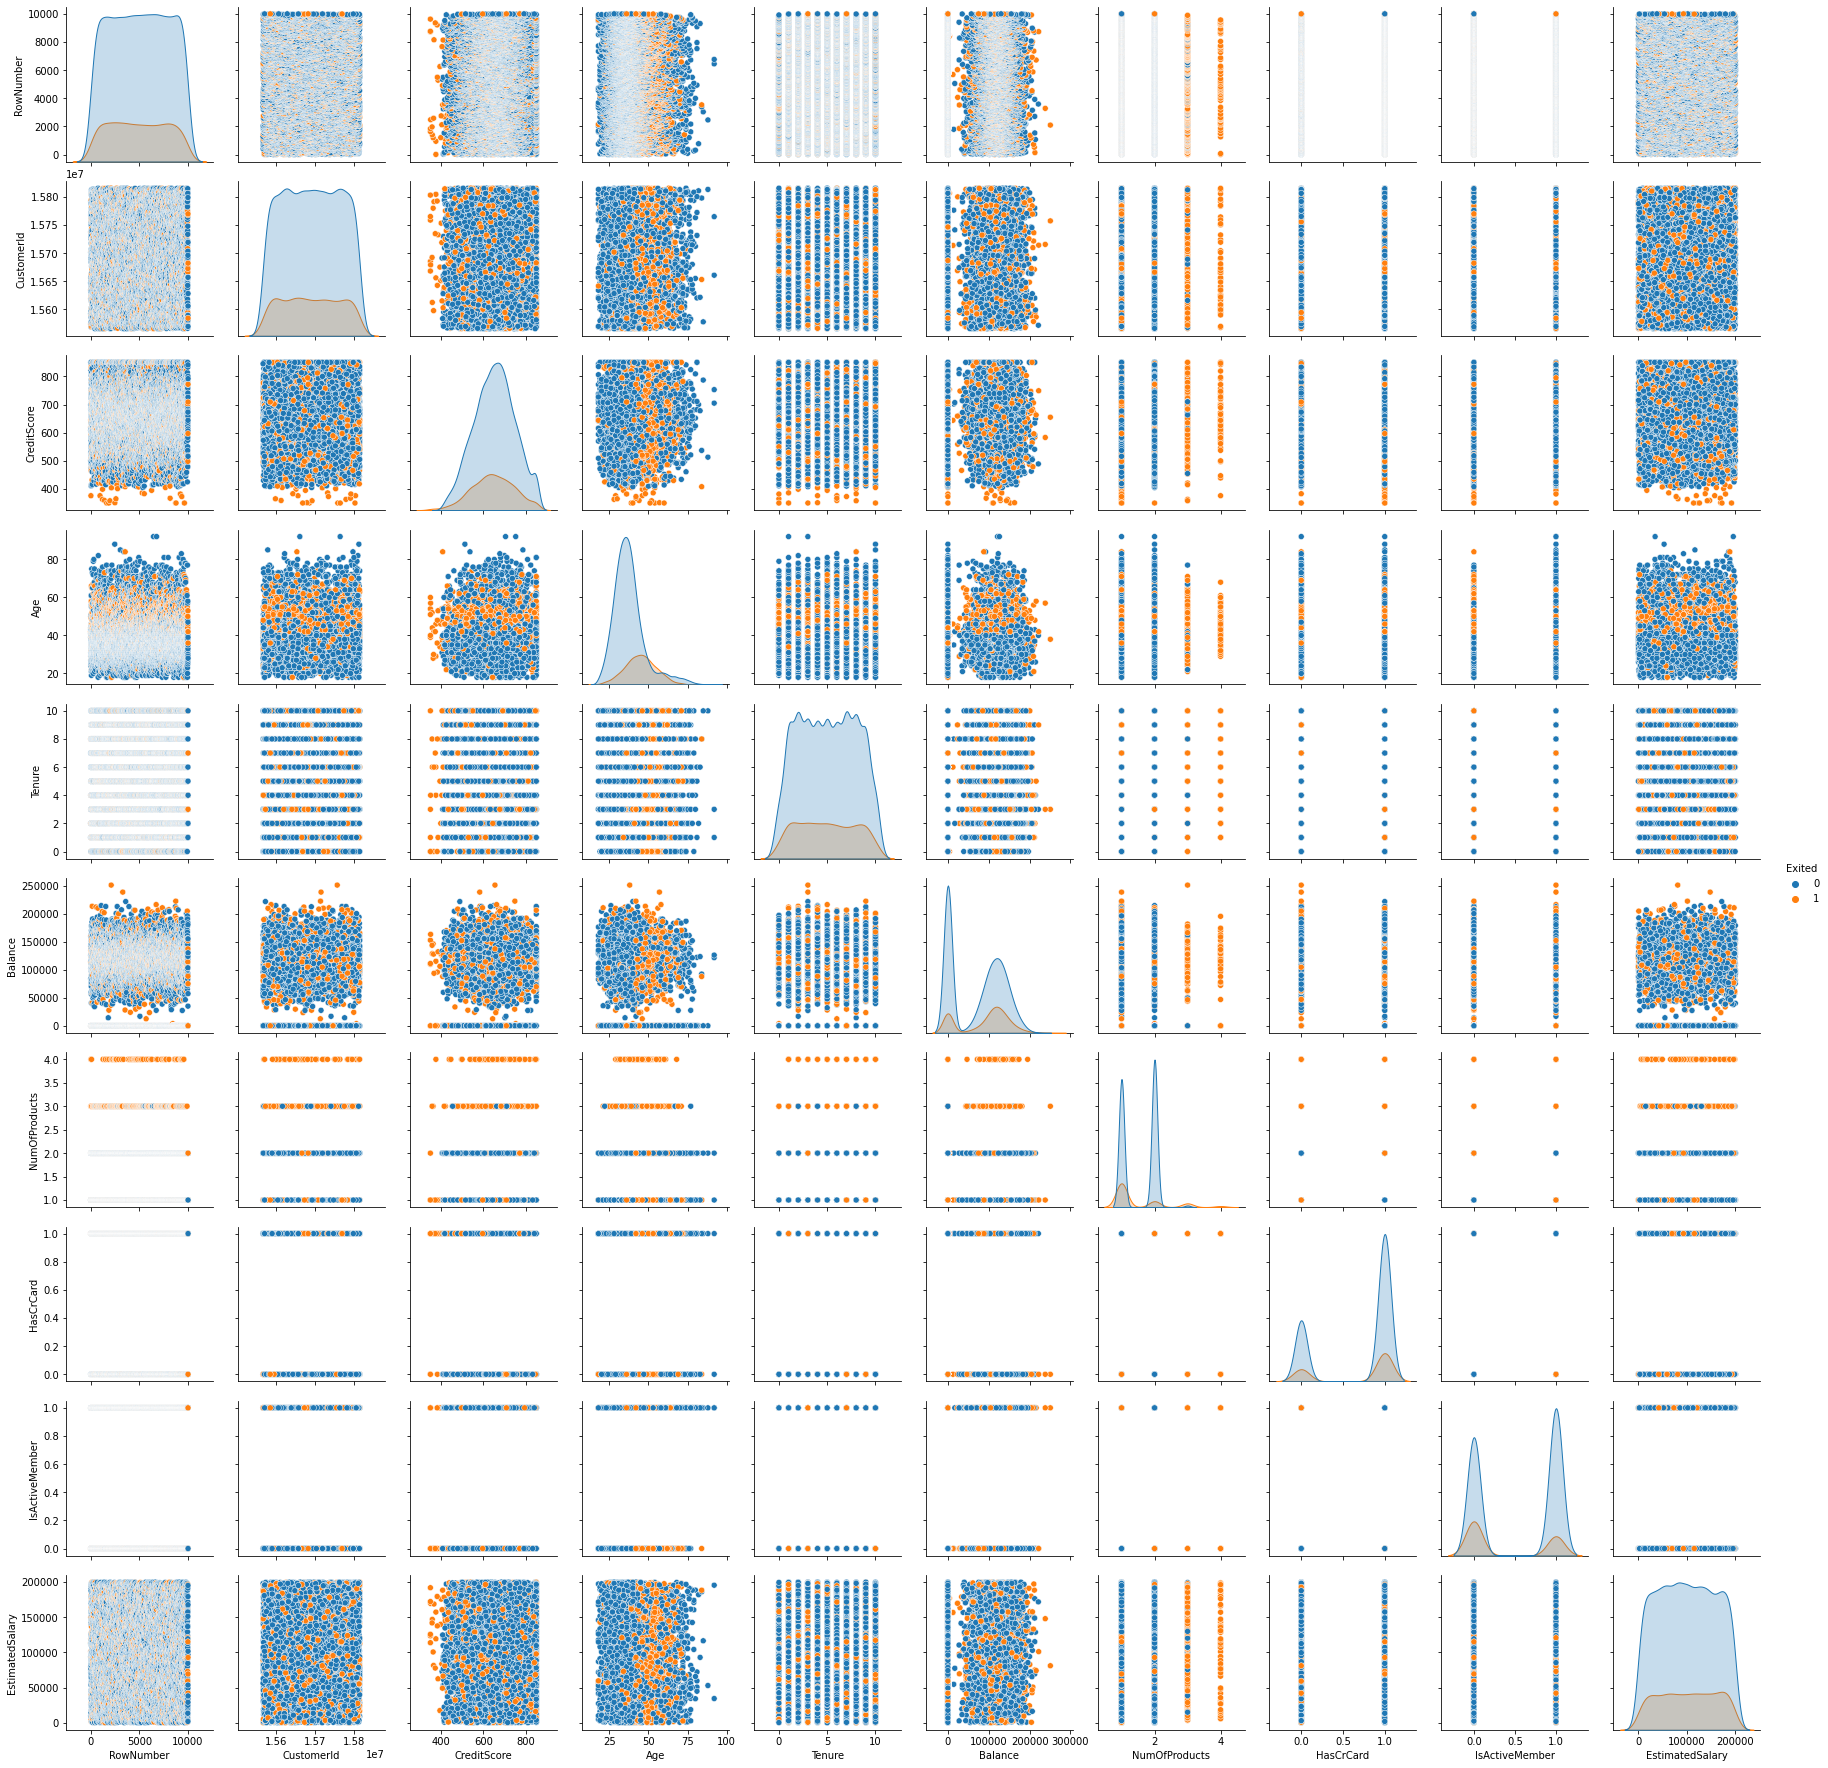

In [7]:
sns.pairplot(df,hue='Exited');

## 4.Perform descriptive statistics on the dataset</b>

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


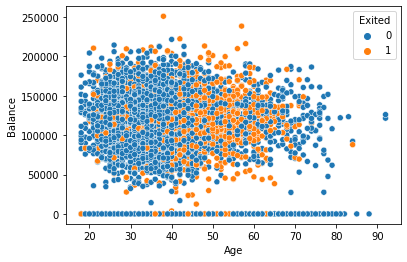

In [9]:
sns.scatterplot(data=df, x="Age", y="Balance", hue="Exited");

In [10]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## 5.Handle the Missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


It has no missing values

## 6.Find the outliers and replace the outliers

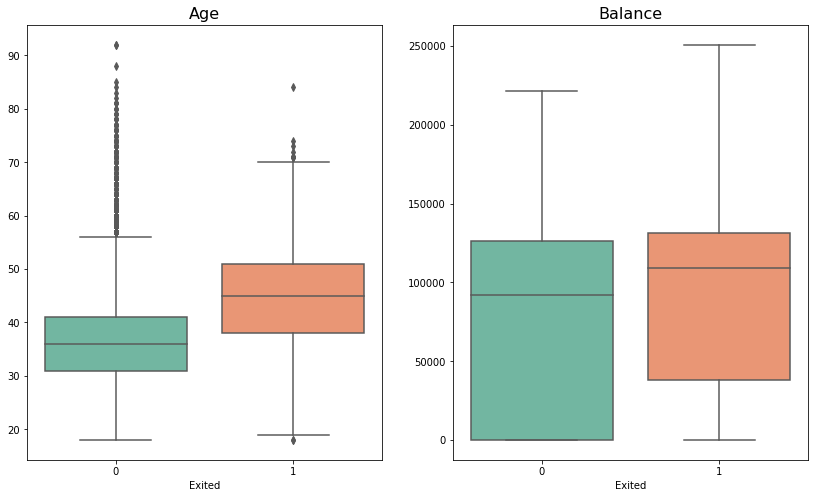

In [12]:
fig, axes = plt.subplots(1,2,figsize=(14,8))

high_correlation = ['Age', 'Balance']

for i, ax in enumerate(axes.flatten()):
    if i == 5:
        ax.axis('off')
        break
    sns.boxplot(x='Exited', y=high_correlation[i], data=df, ax=ax, palette=sns.color_palette('Set2', 2))
    ax.set_ylabel(None)
    ax.set_title(label=high_correlation[i], fontsize=16, fontweight='light')
plt.plot();

As we can see there are outliers at both the ends of the Age boxplot. So removing them from our dataset

Here we remove the data points which lies above Q75 + 1.5 IQR and below Q25+ 1.5IQR 

In [13]:
v_fraud = df[df['Exited']==1]['Age']

q75 = np.percentile(v_fraud, 75)
q25 = np.percentile(v_fraud, 25)
iqr = q75 - q25

v_lower, v_upper = q25-1.5*iqr, q75+1.5*iqr
outliers = [x for x in v_fraud if x > v_upper or x < v_lower]

print(str(len(outliers))+' '+str('Age')+' fraud outliers: '+str(outliers)+'\n')

df_bal_smote = df.drop(df.index[df['Age'].isin(outliers) & 
                                 df['Exited']==1])

13 Age fraud outliers: [73, 18, 71, 74, 71, 84, 71, 71, 71, 71, 72, 18, 71]



## 7.Check for Categorical columns and perform encoding

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [15]:
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'],drop_first=True)
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

In [16]:
df_encoded.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,0.538,0.324324,0.2,0.000000,1,1,1,0.506735,1,0,0,0
1,2,15647311,Hill,0.516,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,1,0
2,3,15619304,Onio,0.304,0.324324,0.8,0.636357,3,1,0,0.569654,1,0,0,0
3,4,15701354,Boni,0.698,0.283784,0.1,0.000000,2,0,0,0.469120,0,0,0,0
4,5,15737888,Mitchell,1.000,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,1,0
5,6,15574012,Chu,0.590,0.351351,0.8,0.453394,2,1,0,0.748797,1,0,1,1
6,7,15592531,Bartlett,0.944,0.432432,0.7,0.000000,2,1,1,0.050261,0,0,0,1
7,8,15656148,Obinna,0.052,0.148649,0.4,0.458540,4,1,0,0.596733,1,1,0,0
8,9,15792365,He,0.302,0.351351,0.4,0.566170,2,0,1,0.374680,0,0,0,1
9,10,15592389,H?,0.668,0.121622,0.2,0.536488,1,1,1,0.358605,0,0,0,1


## 8.Split the data into dependent and independent variables

In [17]:
data = df.iloc[:, :-1].values
print(data)

[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]]


In [18]:
dependency = df.iloc[:, -1].values
print(dependency)

[1 0 1 ... 1 1 0]


## 9.Scale the independent variables

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc= StandardScaler()
X=df.iloc[:,0:12].values
Y=df.iloc[:,12:14].values
X[:,8:12]=sc.fit_transform(X[:,8:12])

## 10.Split the data into training and testing

In [21]:
X = df_encoded.drop('Exited',axis='columns')
y = df_encoded['Exited']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [23]:
X_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5710,5711,15589496,Arrington,0.856,0.216216,0.5,0.554265,2,0,0,0.339721,0,0,1
3745,3746,15808334,Mackay,0.852,0.256757,0.1,0.371163,2,1,1,0.980432,1,0,0
5429,5430,15797905,Walker,0.664,0.405405,0.7,0.000000,2,1,0,0.325318,0,0,0
551,552,15657284,Day,0.648,0.391892,0.6,0.426077,1,1,1,0.010339,1,0,1
8967,8968,15579131,Ricci,0.970,0.094595,0.7,0.000000,2,1,1,0.417230,0,0,1


In [24]:
y_train.head()

5710    0
3745    0
5429    0
551     1
8967    0
Name: Exited, dtype: int64

In [25]:
X_test.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5337,5338,15724076,Christie,0.930,0.527027,0.5,0.0,3,0,0,0.194668,0,1,0
8732,8733,15711386,Trentini,0.748,0.148649,0.6,0.0,2,0,1,0.323621,0,0,0
3359,3360,15747878,Aiken,0.778,0.567568,0.4,0.0,1,1,1,0.258155,0,1,1
5580,5581,15786249,Whitfield,0.532,0.162162,0.2,0.0,2,1,0,0.995535,0,1,1
3485,3486,15728456,Martinez,0.508,0.202703,0.3,0.0,1,1,0,0.210818,0,0,1


In [26]:
y_test.head()

5337    1
8732    0
3359    0
5580    0
3485    1
Name: Exited, dtype: int64